In [51]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Lectura del dataset en crudo
data = pd.read_csv("fire_archive_V1_81287.csv")
# Es posible hacer analisis exploratorio en este punto.


In [53]:
# Data Wrangling.
# Discrimina focos de fuego por parametro de Confianza, alta y nominal.

is_high = data['confidence'] == 'h'
data_high = data[is_high]
is_nom = data['confidence'] == 'n'
data_nom = data[is_nom]
data_proc = [data_high, data_nom]
result = pd.concat(data_proc)

# print (is_high.head())

#x = 0
#for index, row in data.iterrows():
#        if row['confidence'] == 'h':
#               x +=1
#print x
#    data_proc = pd.DataFrame()

#for index, row in data.iterrows():
#        if row['confidence'] == 'h':
#               x +=1
                
#for index, row in data.iterrows():
#    if row['confidence'] == 'h':
#        data_proc = data
#print len(data_proc)        

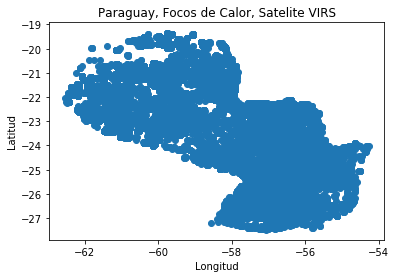

In [55]:
# Visualización de Datos Crudos: Focos por Confidencia.

N = len(result)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2 
# plt.scatter(data_proc['latitude'], data_proc['longitude'],s=area, c=colors, alpha=0.5)
plt.scatter(result['longitude'],result['latitude'])
plt.title('Paraguay, Focos de Calor, Satelite VIRS')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

# Visualizar datos con focos procesados.

In [39]:
# Division de Dataset en partes. 

latTrain, latTest, longTrain, longTest = train_test_split(result['latitude'], result['longitude'], test_size=0.30, random_state= 0)
# 30% del dataset es usado para el entrenamiento.

In [46]:
# Entrenamiento de machine learning
train_x =  np.zeros((len(latTrain), 2))
train_x[:,0] = latTrain
train_x[:,1] = longTrain
kmeans = KMeans(n_clusters=100, random_state=0).fit(train_x)

# Training optimo? Ejecutar Tests, Repetir modelado.
# Tests repetidos, para evitar la caida en minimo local.

In [47]:
# Prediccion de Zonas de R
y_kmeans = kmeans.predict(train_x)
# Tests de Rendimiento del Algoritmo.

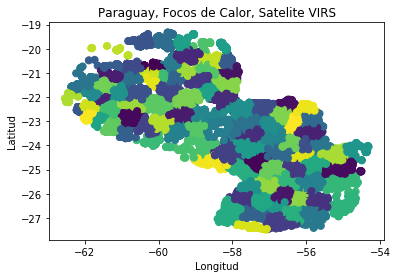

In [56]:
plt.title('Paraguay, Focos de Calor, Satelite VIRS')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.scatter(train_x[:, 1],train_x[:, 0], c=y_kmeans, s=50, cmap='viridis')


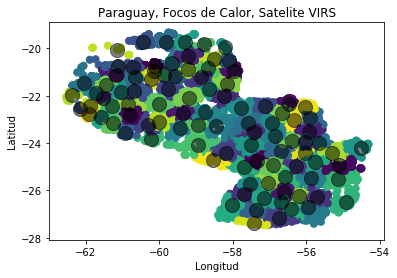

In [57]:
plt.title('Paraguay, Focos de Calor, Satelite VIRS')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.scatter(train_x[:, 1], train_x[:, 0], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);


In [ ]:
# Dada una coordenada de una fotografia, chequear que la lat, long, pertenezcan a algun cluster.
